# Taller Evaluado de Aprendizaje No Supervisado


## Nombre Lucas Villarroel
## ROL 201630004-K


# COVID 19

## Minería de Datos 2020

**Disclaimer**: Este taller utiliza datos oficiales del COVID-19, pandemia en curso que ha causado muchas y lamentables muertes a connacionales y en todo el mundo. El objetivo de trabajar con estos datos es mostrar la relevancia de las competencias del ramo para un mundo que toma decisiones importantes en base a la minería de datos. Sin embargo, *evite generarse opiniones o juicios en base a las conclusiones de este ejercicio*. Son los expertos en epidemiología, en salud pública, y los cientistas de datos que llevan decadas de experiencia los llamados a analizar estos datos con la debida seriedad que se merece la situación. Además, siempre recuerde que correlación (que analizamos aquí) no implica causalidad necesariamente.

### 1.- Selección y Descripción de Datos  

**1.1**- Descargue comma separated values ``comuna.csv`` del aula virtual (mismo lugar donde encontró este archivo). Este CSV contiene datos sobre la pandemia, y corresponden al Data Product 1 de la Mesa de Datos COVID-19 del Ministerio de Ciencia: https://github.com/MinCiencia/Datos-COVID19.


**PREGUNTA**: Escriba aquí en markdown una breve descripción de los datos que resuma la descripción que entrega el MinCiencia. ¿Cuáles features son númericos y cuáles categóricos?

| Region              	| Codigo region           	| Comuna              	| Codigo comuna           	| Poblacion              	| [Fechas]                              	| Tasa                                                                      	|
|---------------------	|-------------------------	|---------------------	|-------------------------	|------------------------	|---------------------------------------	|---------------------------------------------------------------------------	|
| Nombre de la región 	| Numeracion de la región 	| Nombre de la comuna 	| Numeracion de la comuna 	| Poblacion de la comuna 	| Contagiados en la comuna en esa fecha 	| Número de casos confirmados por cada 100 mil habitantes de una población  	|
|          Categorico           	|          Categorico               	|             Categorico        	|      Categorico                   	|            Numérico            	|                     Numérico                  	|                                         Numérico                                  	|

**1.2**- Cargue el archivo en un DataFrame pandas. 
* Elimine todos los samples (muestras) que tengan valores NaN (o impútelos si es valiente)
* Imprima las estadísticas básicas de su dataset (media, varianza, máximos y mínimos) y su cabecera y cola para verificar el contenido
* Imprima como ha variado la cantidad de casos en promedio por comuna con su respectivo intervalo de confianza (hint: fill_between)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('comuna.csv')
df0 = df.dropna(axis = 0)
df0.reset_index()


df0.describe()

,Codigo region,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,2020-04-24,2020-04-27,2020-05-01,2020-05-04,Tasa
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,8.810496,9046.854227,56478.332362,5.647230,8.201166,10.230321,13.338192,15.376093,18.239067,21.740525,23.717201,26.807580,30.364431,35.489796,39.845481,49.381924,59.769679,64.424781
std,3.858113,3830.151230,89275.073876,19.022787,25.326241,31.163069,38.610091,42.978931,49.725104,56.616332,61.445396,69.212304,76.842047,88.705369,98.182382,120.704401,149.390485,104.985175
min,1.000000,1101.000000,137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6109.500000,9535.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000,1.000000,5.200000
50%,8.000000,8314.000000,20071.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,6.000000,6.000000,27.700000
75%,13.000000,13103.500000,54824.500000,0.000000,5.000000,7.000000,9.000000,11.000000,12.000000,14.000000,14.500000,15.500000,19.500000,22.000000,22.500000,26.500000,31.000000,81.900000
max,16.000000,16305.000000,645909.000000,181.000000,225.000000,293.000000,365.000000,407.000000,443.000000,471.000000,506.000000,547.000000,605.000000,688.000000,764.000000,980.000000,1294.000000,958.100000


In [45]:
df0.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,2020-04-24,2020-04-27,2020-05-01,2020-05-04,Tasa
0,Arica y Parinacota,15,Arica,15101,247552.0,6.0,6.0,12.0,41.0,63.0,87.0,115.0,124.0,134.0,166.0,224.0,270.0,297.0,310.0,125.2
1,Arica y Parinacota,15,Camarones,15102,1233.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arica y Parinacota,15,General Lagos,15202,810.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tarapacá,1,Alto Hospicio,1107,129999.0,0.0,0.0,0.0,5.0,6.0,10.0,14.0,15.0,16.0,27.0,39.0,55.0,77.0,128.0,98.5


In [46]:
df0.tail()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,2020-04-24,2020-04-27,2020-05-01,2020-05-04,Tasa
341,Magallanes,12,Punta Arenas,12101,141984.0,29.0,87.0,143.0,203.0,207.0,299.0,387.0,416.0,470.0,516.0,581.0,623.0,685.0,744.0,524.0
342,Magallanes,12,Rio Verde,12103,211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,Magallanes,12,San Gregorio,12104,681.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,Magallanes,12,Timaukel,12303,282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,Magallanes,12,Torres del Paine,12402,1021.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,97.9


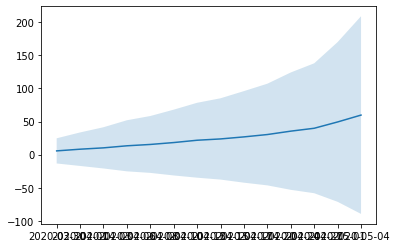

In [47]:
df = df0.drop(columns=['Poblacion','Tasa','Codigo region','Codigo comuna'])

x =  df.mean()
y = df.std()

fig, ax = plt.subplots()
ax.plot( x.index, x , '-')
ax.fill_between(x.index, x-y, x+y, alpha=0.2)

**PREGUNTA**: ¿Qué significa que la varianza aumente? ¿Por qué usted cree que la media es un mal estimador en este caso?

* Que la varianza aumente significa que la dispersión de los datos también aumenta.
* Tal como se puede ver en el gráfico, se aprecia que la media es un mal estimador. Además de que es sensible a casos extremos.

**1.3**- Agrupe los datos por región e imprima las estadísticas (describe) de cada regíon *solo para las columnas referentes a los días*. Grafique la tendencia de contagios (x=días, y=contagios) por región.


In [2]:
df0.groupby("Region").describe().drop(['Codigo region','Codigo comuna','Poblacion','Tasa'], axis=1)

2020-03-30                                               \
                        count       mean        std  min  25%   50%    75%   
Region                                                                       
Antofagasta               9.0   3.222222   9.666667  0.0  0.0   0.0   0.00   
Araucanía                31.0   6.032258  27.562636  0.0  0.0   0.0   0.00   
Arica y Parinacota        4.0   1.500000   3.000000  0.0  0.0   0.0   1.50   
Atacama                   9.0   0.000000   0.000000  0.0  0.0   0.0   0.00   
Aysén                    10.0   0.000000   0.000000  0.0  0.0   0.0   0.00   
Biobío                   32.0   2.250000   6.074803  0.0  0.0   0.0   0.00   
Coquimbo                 15.0   1.400000   4.436859  0.0  0.0   0.0   0.00   
Los Lagos                30.0   3.466667  13.348727  0.0  0.0   0.0   0.00   
Los Ríos                 12.0   1.000000   3.464102  0.0  0.0   0.0   0.00   
Magallanes               11.0   3.090909   8.723010  0.0  0.0   0.0   0.00   
Maule                    30.0   1.600000   6.289564  0.0  0.0   0.0   0.00   
Metropolitana            52.0  22.692308  33.987621  0.0  3.0  11.5  24.25   
O’Higgins                33.0   0.212121   1.218544  0.0  0.0   0.0   0.00   
Tarapacá                  7.0   0.714286   1.889822  0.0  0.0   0.0   0.00   
Valparaíso               37.0   2.189189   5.767909  0.0  0.0   0.0   0.00   
Ñuble                    21.0   7.190476  24.802458  0.0  0.0   0.0   0.00   

                          2020-04-01             ... 2020-05-01         \
                      max      count       mean  ...        75%    max   
Region                                           ...                     
Antofagasta          29.0        9.0   3.555556  ...      71.00  378.0   
Araucanía           154.0       31.0   9.290323  ...      27.00  673.0   
Arica y Parinacota    6.0        4.0   1.500000  ...      74.25  297.0   
Atacama               0.0        9.0   0.000000  ...       7.00   19.0   
Aysén                 0.0       10.0   0.000000  ...       0.75    2.0   
Biobío               28.0       32.0   7.000000  ...      20.25  147.0   
Coquimbo             17.0       15.0   1.533333  ...       8.50   29.0   
Los Lagos            66.0       30.0   5.633333  ...       8.75  306.0   
Los Ríos             12.0       12.0   4.500000  ...      10.00  110.0   
Magallanes           29.0       11.0   8.818182  ...       8.00  685.0   
Maule                34.0       30.0   1.833333  ...      12.25  160.0   
Metropolitana       181.0       52.0  28.519231  ...     263.75  980.0   
O’Higgins             7.0       33.0   0.515152  ...       4.00   38.0   
Tarapacá              5.0        7.0   1.285714  ...      54.00   90.0   
Valparaíso           29.0       37.0   3.000000  ...      13.00  123.0   
Ñuble               114.0       21.0  11.666667  ...      35.00  414.0   

                   2020-05-04                                             \
                        count        mean         std  min    25%    50%   
Region                                                                     
Antofagasta               9.0   83.222222  154.722960  0.0   4.00   13.0   
Araucanía                31.0   42.096774  122.215480  0.0   4.50    6.0   
Arica y Parinacota        4.0   77.500000  155.000000  0.0   0.00    0.0   
Atacama                   9.0    8.000000   12.469964  0.0   1.00    1.0   
Aysén                    10.0    0.400000    0.699206  0.0   0.00    0.0   
Biobío                   32.0   23.687500   39.506176  0.0   0.75    5.0   
Coquimbo                 15.0    6.933333   10.457169  0.0   0.00    1.0   
Los Lagos                30.0   16.766667   57.419619  0.0   0.00    1.0   
Los Ríos                 12.0   16.666667   34.591994  0.0   1.00    3.5   
Magallanes               11.0   71.000000  223.288155  0.0   0.00    1.0   
Maule                    30.0   13.766667   29.802434  0.0   2.00    4.5   
Metropolitana            52.0  259.096154  260.905006  0.0  73.50

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B867EDAD48>,
      dtype=object)

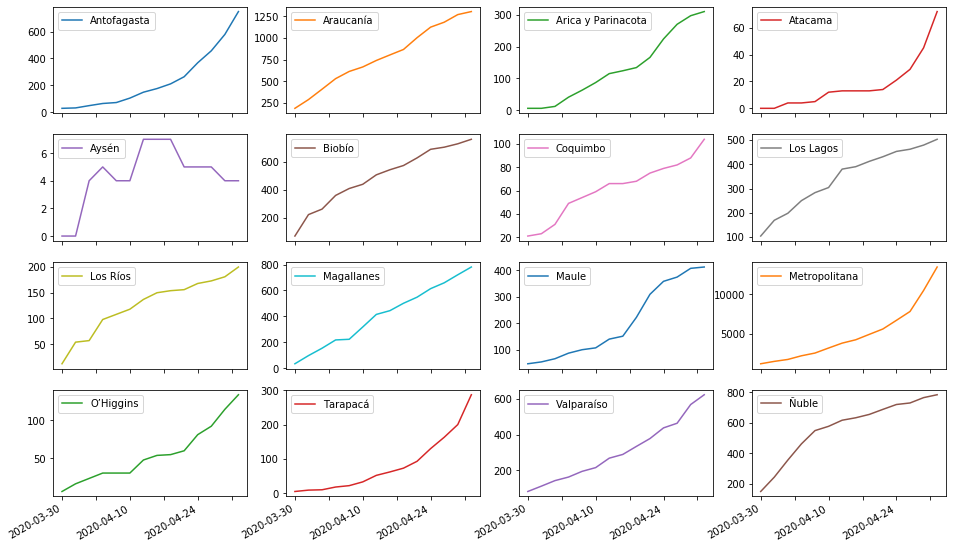

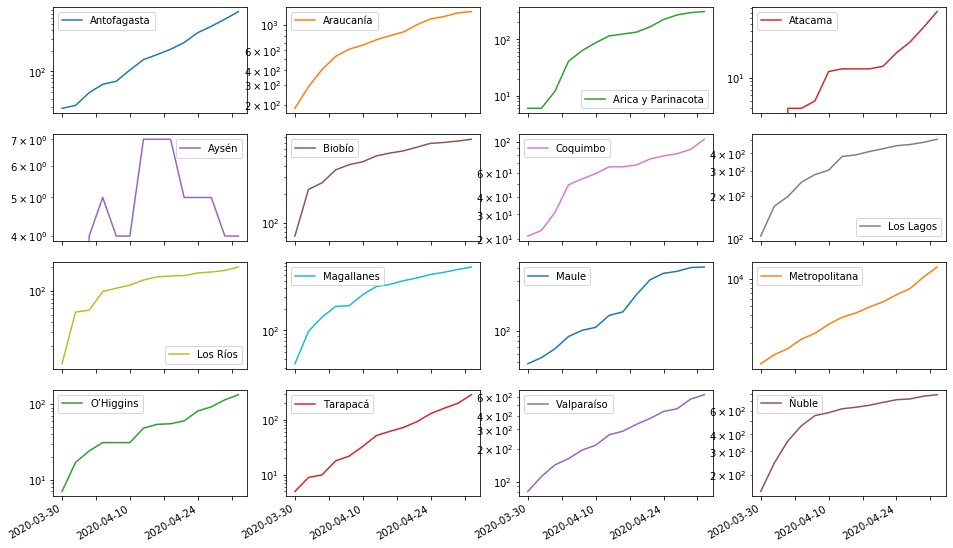

In [3]:
df_days = df0.drop(['Poblacion','Tasa','Comuna','Codigo region','Codigo comuna'], axis=1)

df_sum = df_days.groupby('Region').sum().T

df_sum.plot(subplots=True, layout = (4,4), figsize = (16,10))
df_sum.plot(logy = True, subplots=True, layout = (4,4), figsize = (16,10))

**PREGUNTA**: ¿Tiene alguna conclusión usted respecto a las regiones? (hint: hay que aplicar escala logarítmica para visualizar datos exponenciales)

* Sobre las regiones se observa que las del sur, empiezan a estancarse con los contagios, excepto Magallanes, mientras que las regiones sobre O'Higgins, la curva se encuentra en ascenso.

### 2- Reducción de Dimensionalidad y Visualización

**2.1**- Compute la matriz de correlaciones del DataFrame original (sólo valores numéricos) y presentela gráficamente como un mapa de calor. 

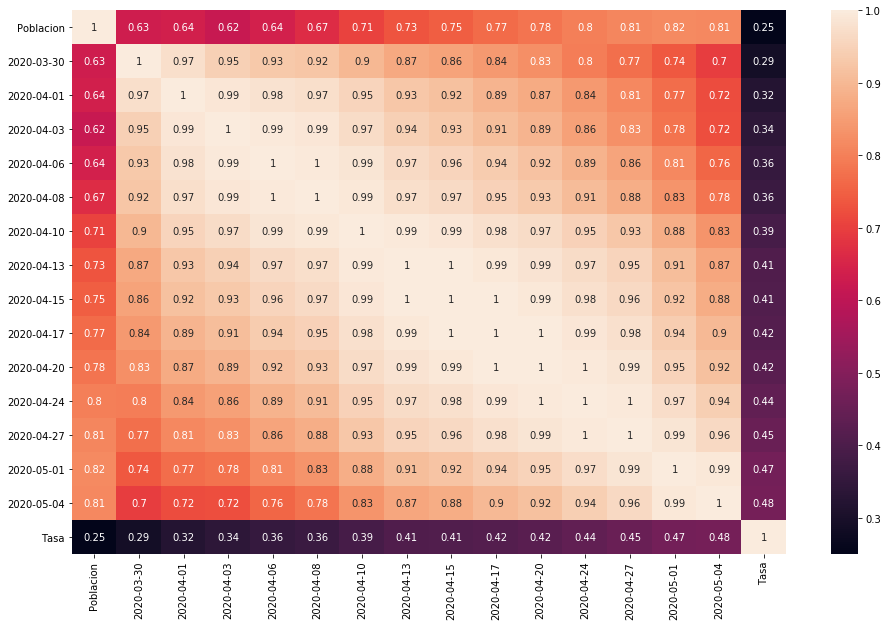

In [4]:
import seaborn as sns

df_days = df0.drop(['Region','Comuna','Codigo region', 'Codigo comuna'], axis=1)
fig= plt.figure(figsize=(16,10))
ax= fig.add_subplot(111)
sns.heatmap(df_days.corr(),annot=True)

**PREGUNTA**: ¿Qué estructura tiene la matriz? ¿Qué patrón general usted identifica? ¿Qué puede usted intuir respuesto a la columna de población?

* Es una matriz triangular.
* Cada día con el día siguiente y pasado tienen alta correlación, lo cual se ve en la diagonal de la matriz.
* Con el pasar de los días se aumenta la correlación.

**2.2**- Aplique el Análisis de Componentes Principales considerando 5 componentes. Grafique las proyecciones 2D de las 5 dimensiones PCA con la variable ``Region`` como descriptor de color de los puntos. Además, indique cuanto de la varianza se explica con estas 5 dimensiones y muestre la matriz de correlación de esas 5 dimensiones.

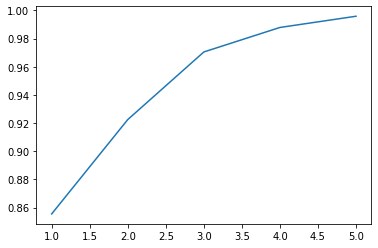

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np


santab=df_days.astype(float)
scaler = StandardScaler().fit(santab)
stdtab = pd.DataFrame(scaler.transform(santab))
n = 5
sklearn_pca = PCA(n_components=n,random_state=1)
xpca = sklearn_pca.fit_transform(stdtab)
varx=sklearn_pca.explained_variance_ratio_
plt.plot(np.arange(1,n+1),varx.cumsum())

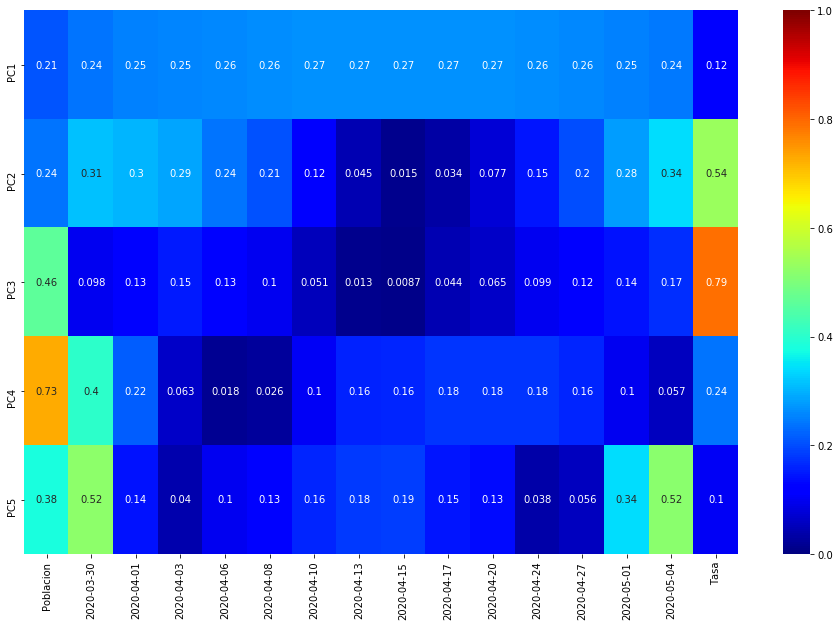

In [6]:
components = sklearn_pca.components_
ind=[]
for i in range(components.shape[0]):
    ind.append("PC"+str(i+1))
feature_weights= pd.DataFrame(np.abs(components),columns=santab.columns,index=ind)
fig= plt.figure(figsize=(16,10))
ax= fig.add_subplot(111)
ax = sns.heatmap(feature_weights,cmap="jet",vmin=0,vmax=1, annot = True)

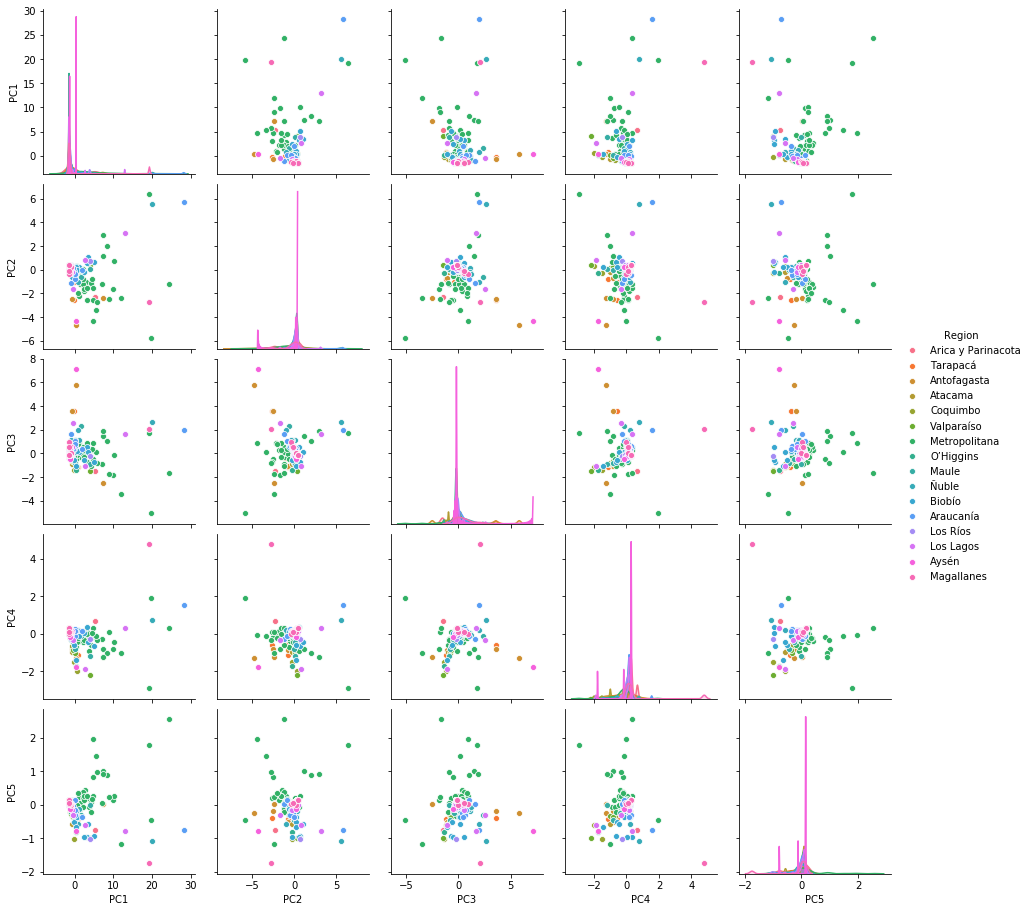

In [9]:
transtab = pd.DataFrame(xpca,columns=ind)
transtab["Region"] = df0["Region"]
sns.pairplot(transtab,diag_kind="kde", hue= "Region")

**PREGUNTA**: Ocupe estos 3 gráficos para argumentar lo pertinente de PCA en este caso.

* Del primer gráfico se aprecia que los PCA representan bien los datos.
*

### 3- Clustering 
**3.1** Aplique al menos dos algoritmos de clustering a las dimensiones salidas del PCA. Si el algoritmo lo requiere, fije la cantidad de clusters a 3. Grafique los restultados ocupando proyecciones a 2D con colores por cluster.

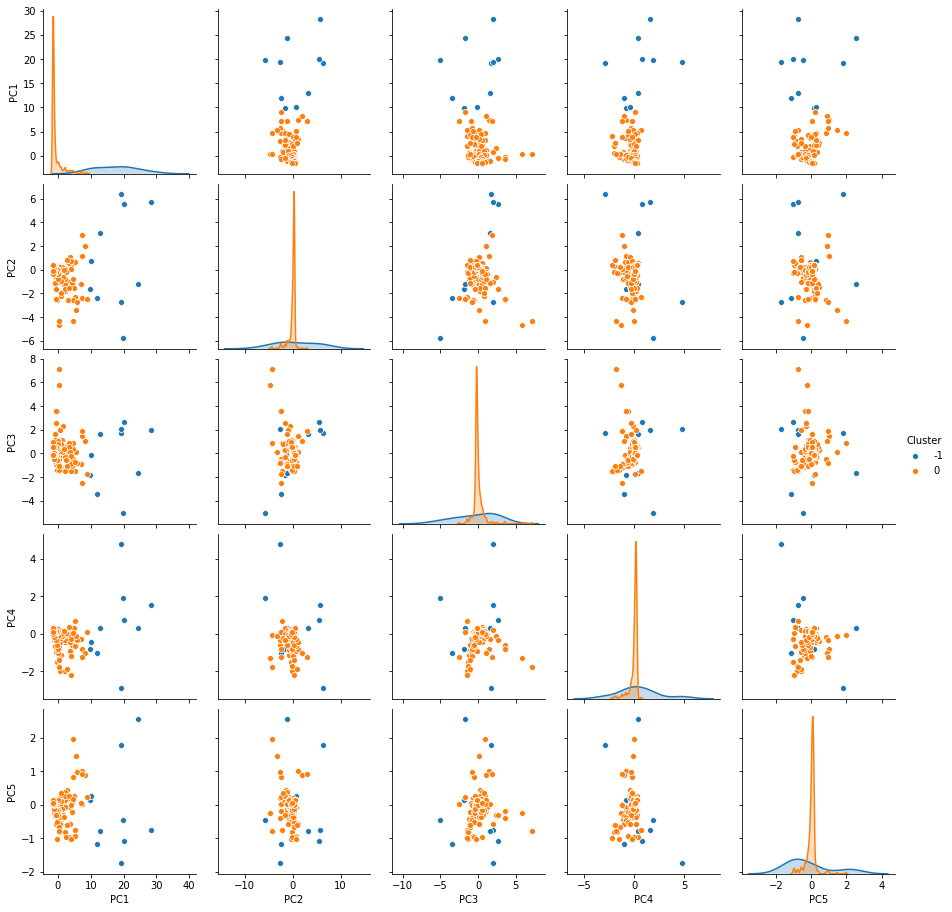

In [10]:
from sklearn.cluster import KMeans, DBSCAN
from ipywidgets import interact
rad = 5.0
db = DBSCAN(rad,min_samples=50).fit(xpca)  
transtab['Cluster']=db.labels_
sns.pairplot(transtab,vars=ind, hue="Cluster")

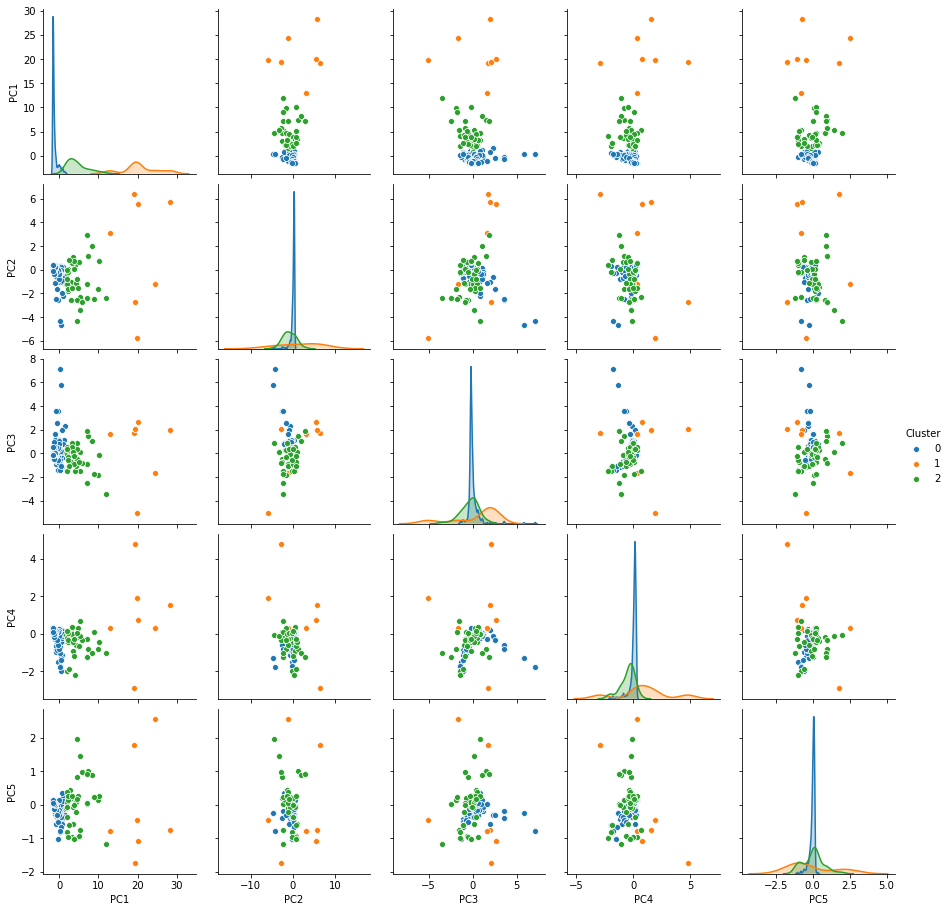

In [11]:
tclust= xpca#[transtab['cluster']]
km = KMeans(3).fit(tclust)

newtab = pd.DataFrame(tclust,columns=ind)
newtab['Cluster'] = km.labels_
sns.pairplot(newtab, vars=ind, hue='Cluster')

**PREGUNTA**: ¿Qué algoritmo se parece más adecuado cualitativamente? Seleccione este algoritmo para la siguiente pregunta. Tenga presente que comparar cuantitativamente clusters es complejo (muy posible!, pero aún no lo hemos visto).

* Se ve que Kmeans es más apropiado.

**3.2** Revise cuales son y cambie fundadamente el/los parámetros del algoritmo.  (2 o 3 variaciones)

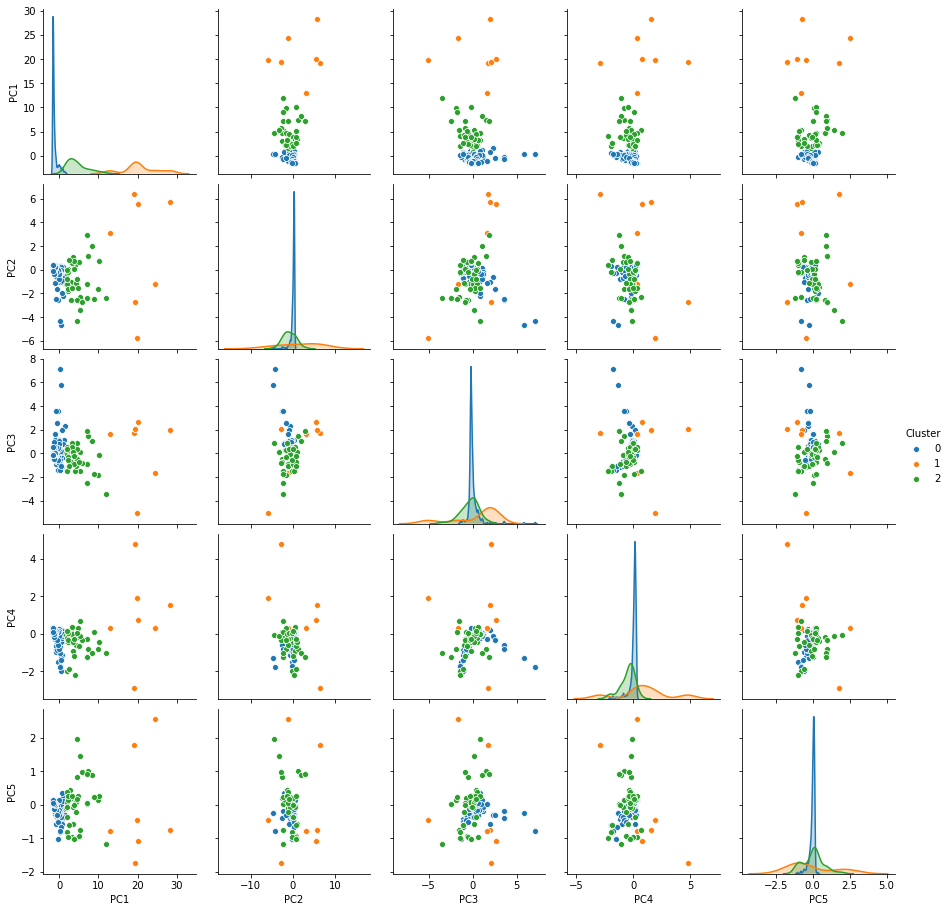

In [70]:
tclust= xpca#[transtab['cluster'] == 0]
km = KMeans(3,max_iter =1).fit(tclust)

newtab1 = pd.DataFrame(tclust,columns=ind)
newtab1['Cluster'] = km.labels_
sns.pairplot(newtab, vars=ind, hue='Cluster')

**PREGUNTA**: ¿Cuál es el mejor conjunto de parámetros? Jusitifque brevemente.

**3.3** Muestre las tablas con la información de los features y samples de cada cluster (máximo 3) utilizando el mejor conjunto de datos.

**PREGUNTA FINAL**: Ponga un nombre identificativo a los 3 clusters, y explique **muy** brevemente si correspondería o no tomar medidas diferenciadas para cada cluster.

In [76]:
df1 = df0
df1['Cluster'] = newtab['Cluster']

df_sum = df1.groupby('Cluster')
pd.set_option("display.max_rows", None, "display.max_columns", None)

df_sum.get_group(0)['Region']

1      Arica y Parinacota
2      Arica y Parinacota
3      Arica y Parinacota
4                Tarapacá
5                Tarapacá
6                Tarapacá
7                Tarapacá
8                Tarapacá
9                Tarapacá
10               Tarapacá
12            Antofagasta
13            Antofagasta
14            Antofagasta
15            Antofagasta
16            Antofagasta
17            Antofagasta
18            Antofagasta
19            Antofagasta
20                Atacama
21                Atacama
22                Atacama
23                Atacama
24                Atacama
25                Atacama
26                Atacama
27                Atacama
28                Atacama
29               Coquimbo
30               Coquimbo
31               Coquimbo
32               Coquimbo
33               Coquimbo
34               Coquimbo
35               Coquimbo
36               Coquimbo
37               Coquimbo
38               Coquimbo
39               Coquimbo
40          